In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into the pandas dataframe.
data=pd.read_csv('data.csv')

In [3]:
#printing the first five rows of the dataset
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#printing the last five rows of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
#printing randomly five sample rows of the dataset
data.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
736,UT,68,415,398-3834,no,no,0,162.1,86,27.56,...,86,13.18,189.7,87,8.54,11.0,9,2.97,5,True
2965,WI,103,415,386-8943,no,no,0,180.2,134,30.63,...,85,8.30,181.7,134,8.18,8.4,3,2.27,1,False
1752,NY,181,415,421-8537,yes,no,0,161.3,83,27.42,...,83,10.57,262.0,98,11.79,14.1,3,3.81,0,True
727,NJ,64,415,405-6943,no,no,0,224.8,111,38.22,...,101,16.15,221.4,110,9.96,9.2,2,2.48,1,False
2328,KY,122,415,363-9969,no,no,0,168.3,96,28.61,...,91,7.45,247.2,87,11.12,8.4,6,2.27,1,False


In [6]:
#printing the columns of the dataset
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
#printing the information about then dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
#checking the data types in our dataset
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
#get the summary statistics of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
#checking the missing value in our dataset
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
#checking the duplicates in our dataset
data.duplicated().sum()

0

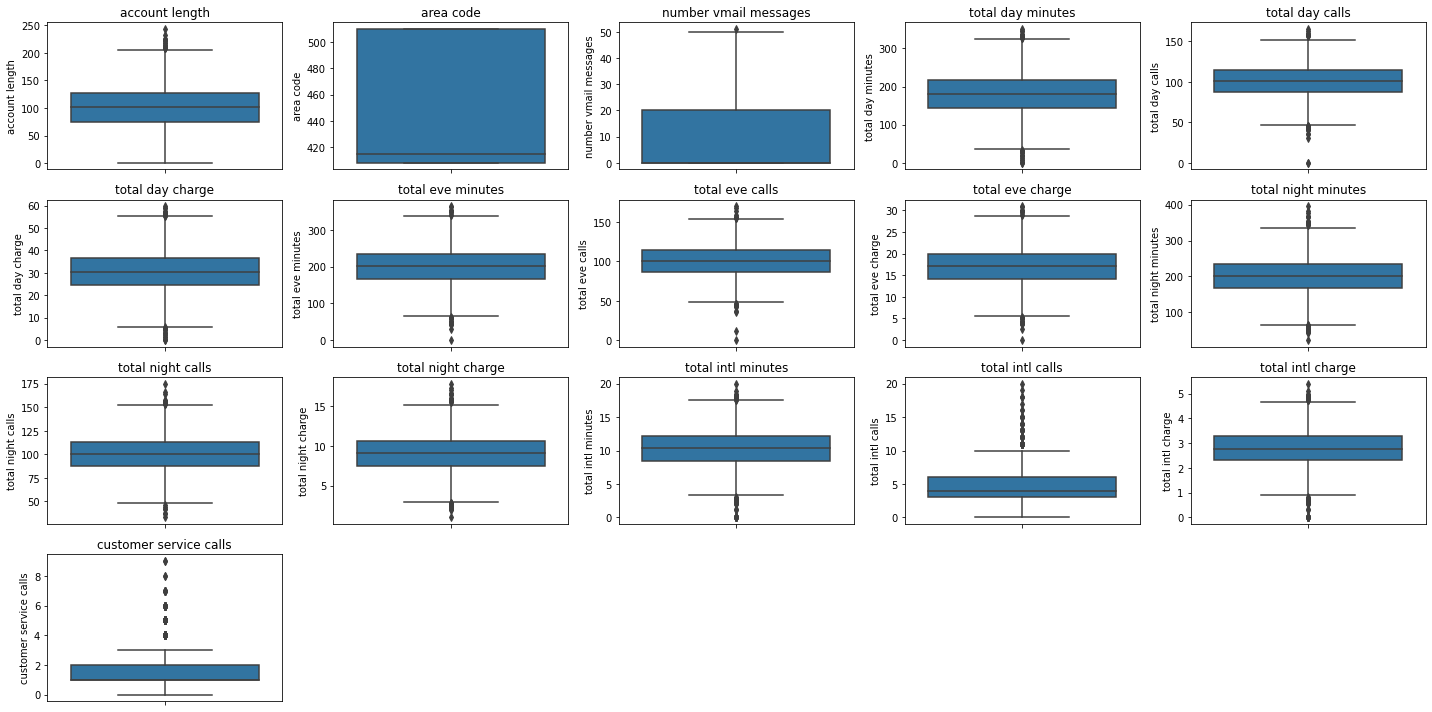

In [12]:
# Create a DataFrame with only numerical columns
numerical_colm = data.select_dtypes(exclude='object').columns

# Exclude 'churn' if it exists
if 'churn' in numerical_colm:
    numerical_colm = numerical_colm.drop('churn')

# Plot boxplots for numerical columns
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_colm):
    plt.subplot(4, 5, i + 1)  # Adjust grid size based on column count
    sns.boxplot(data=data, y=col)  
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
#removing outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the bounds
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply removal for each numerical column
for col in numerical_colm:
    data = remove_outliers(data, col)

print("Outliers have been removed.")

Outliers have been removed.


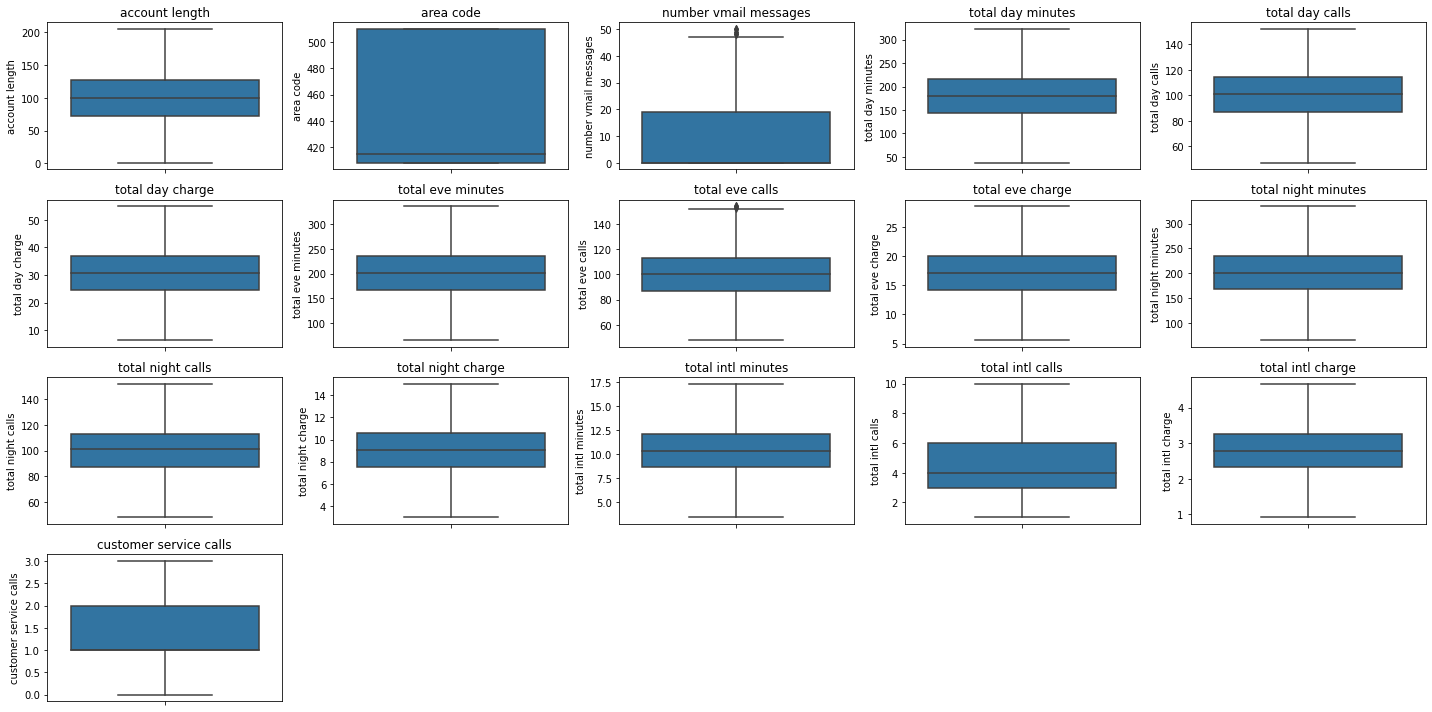

In [14]:
# Boxplot to confirm outlier handling
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_colm):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

False    2493
True      304
Name: churn, dtype: int64


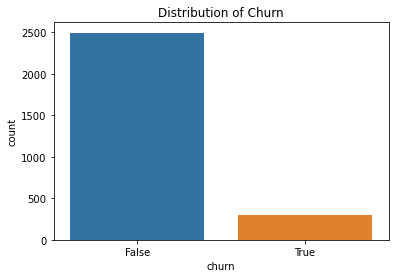

In [15]:
# Check target variable distribution
print(data['churn'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='churn')
plt.title("Distribution of Churn")
plt.show()

# Data preparation

In [16]:
# Drop 'phone number' column as it is not relevant to our analysis and modelling
data = data.drop(columns=["phone number"], axis=1)
data.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [17]:
# Replace spaces with underscores in column names
data.rename(columns=lambda x: x.replace(' ', '_'),inplace=True)
data.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [18]:
# Calculate correlation with the target variable
correlations = data.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn                     1.000000
total_day_minutes         0.296650
total_day_charge          0.296645
total_eve_minutes         0.139158
total_eve_charge          0.139144
total_intl_charge         0.076327
total_intl_minutes        0.076292
total_night_minutes       0.057638
total_night_charge        0.057623
total_day_calls           0.023329
total_night_calls         0.018733
account_length            0.012934
total_eve_calls          -0.003776
area_code                -0.004978
customer_service_calls   -0.016661
total_intl_calls         -0.058596
number_vmail_messages    -0.086322
Name: churn, dtype: float64


# Exploratory data analysis

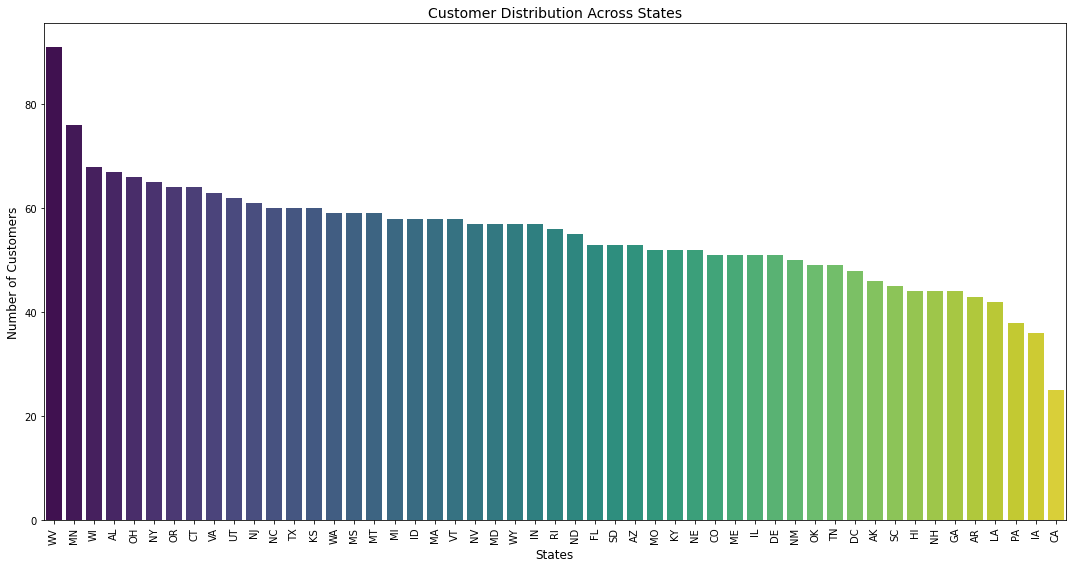

In [19]:

# Plot customer distribution across states
plt.figure(figsize=(15, 8)) 
sns.countplot(data=data, x='state', order=data['state'].value_counts().index, palette='viridis')

# Set the title and labels
plt.title('Customer Distribution Across States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

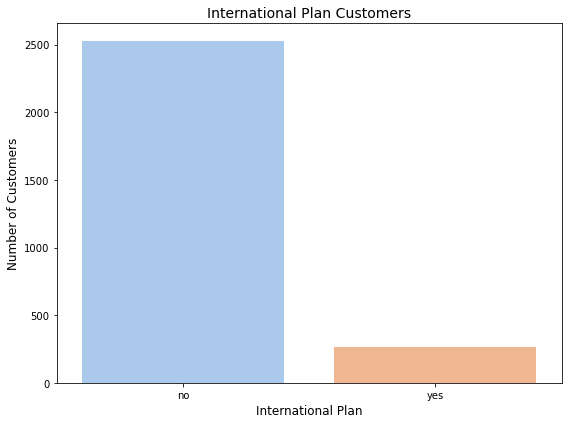

In [20]:
# Plot the distribution of customers with/without an international plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='international_plan', palette='pastel')

# Set the title and axis labels
plt.title('International Plan Customers', fontsize=14)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

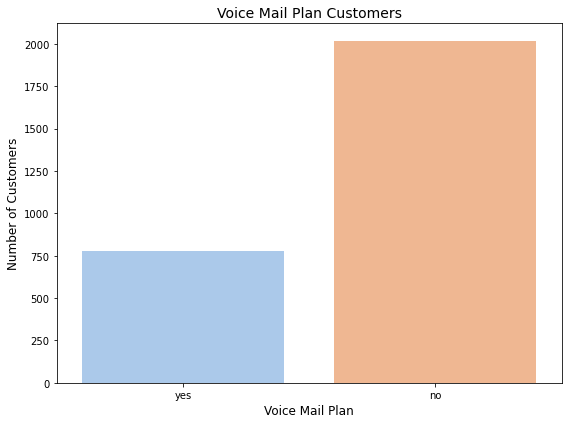

In [21]:
# Plot the distribution of customers with/without a voice mail plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='voice_mail_plan', palette='pastel')

# Set the title and axis labels
plt.title('Voice Mail Plan Customers', fontsize=14)
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

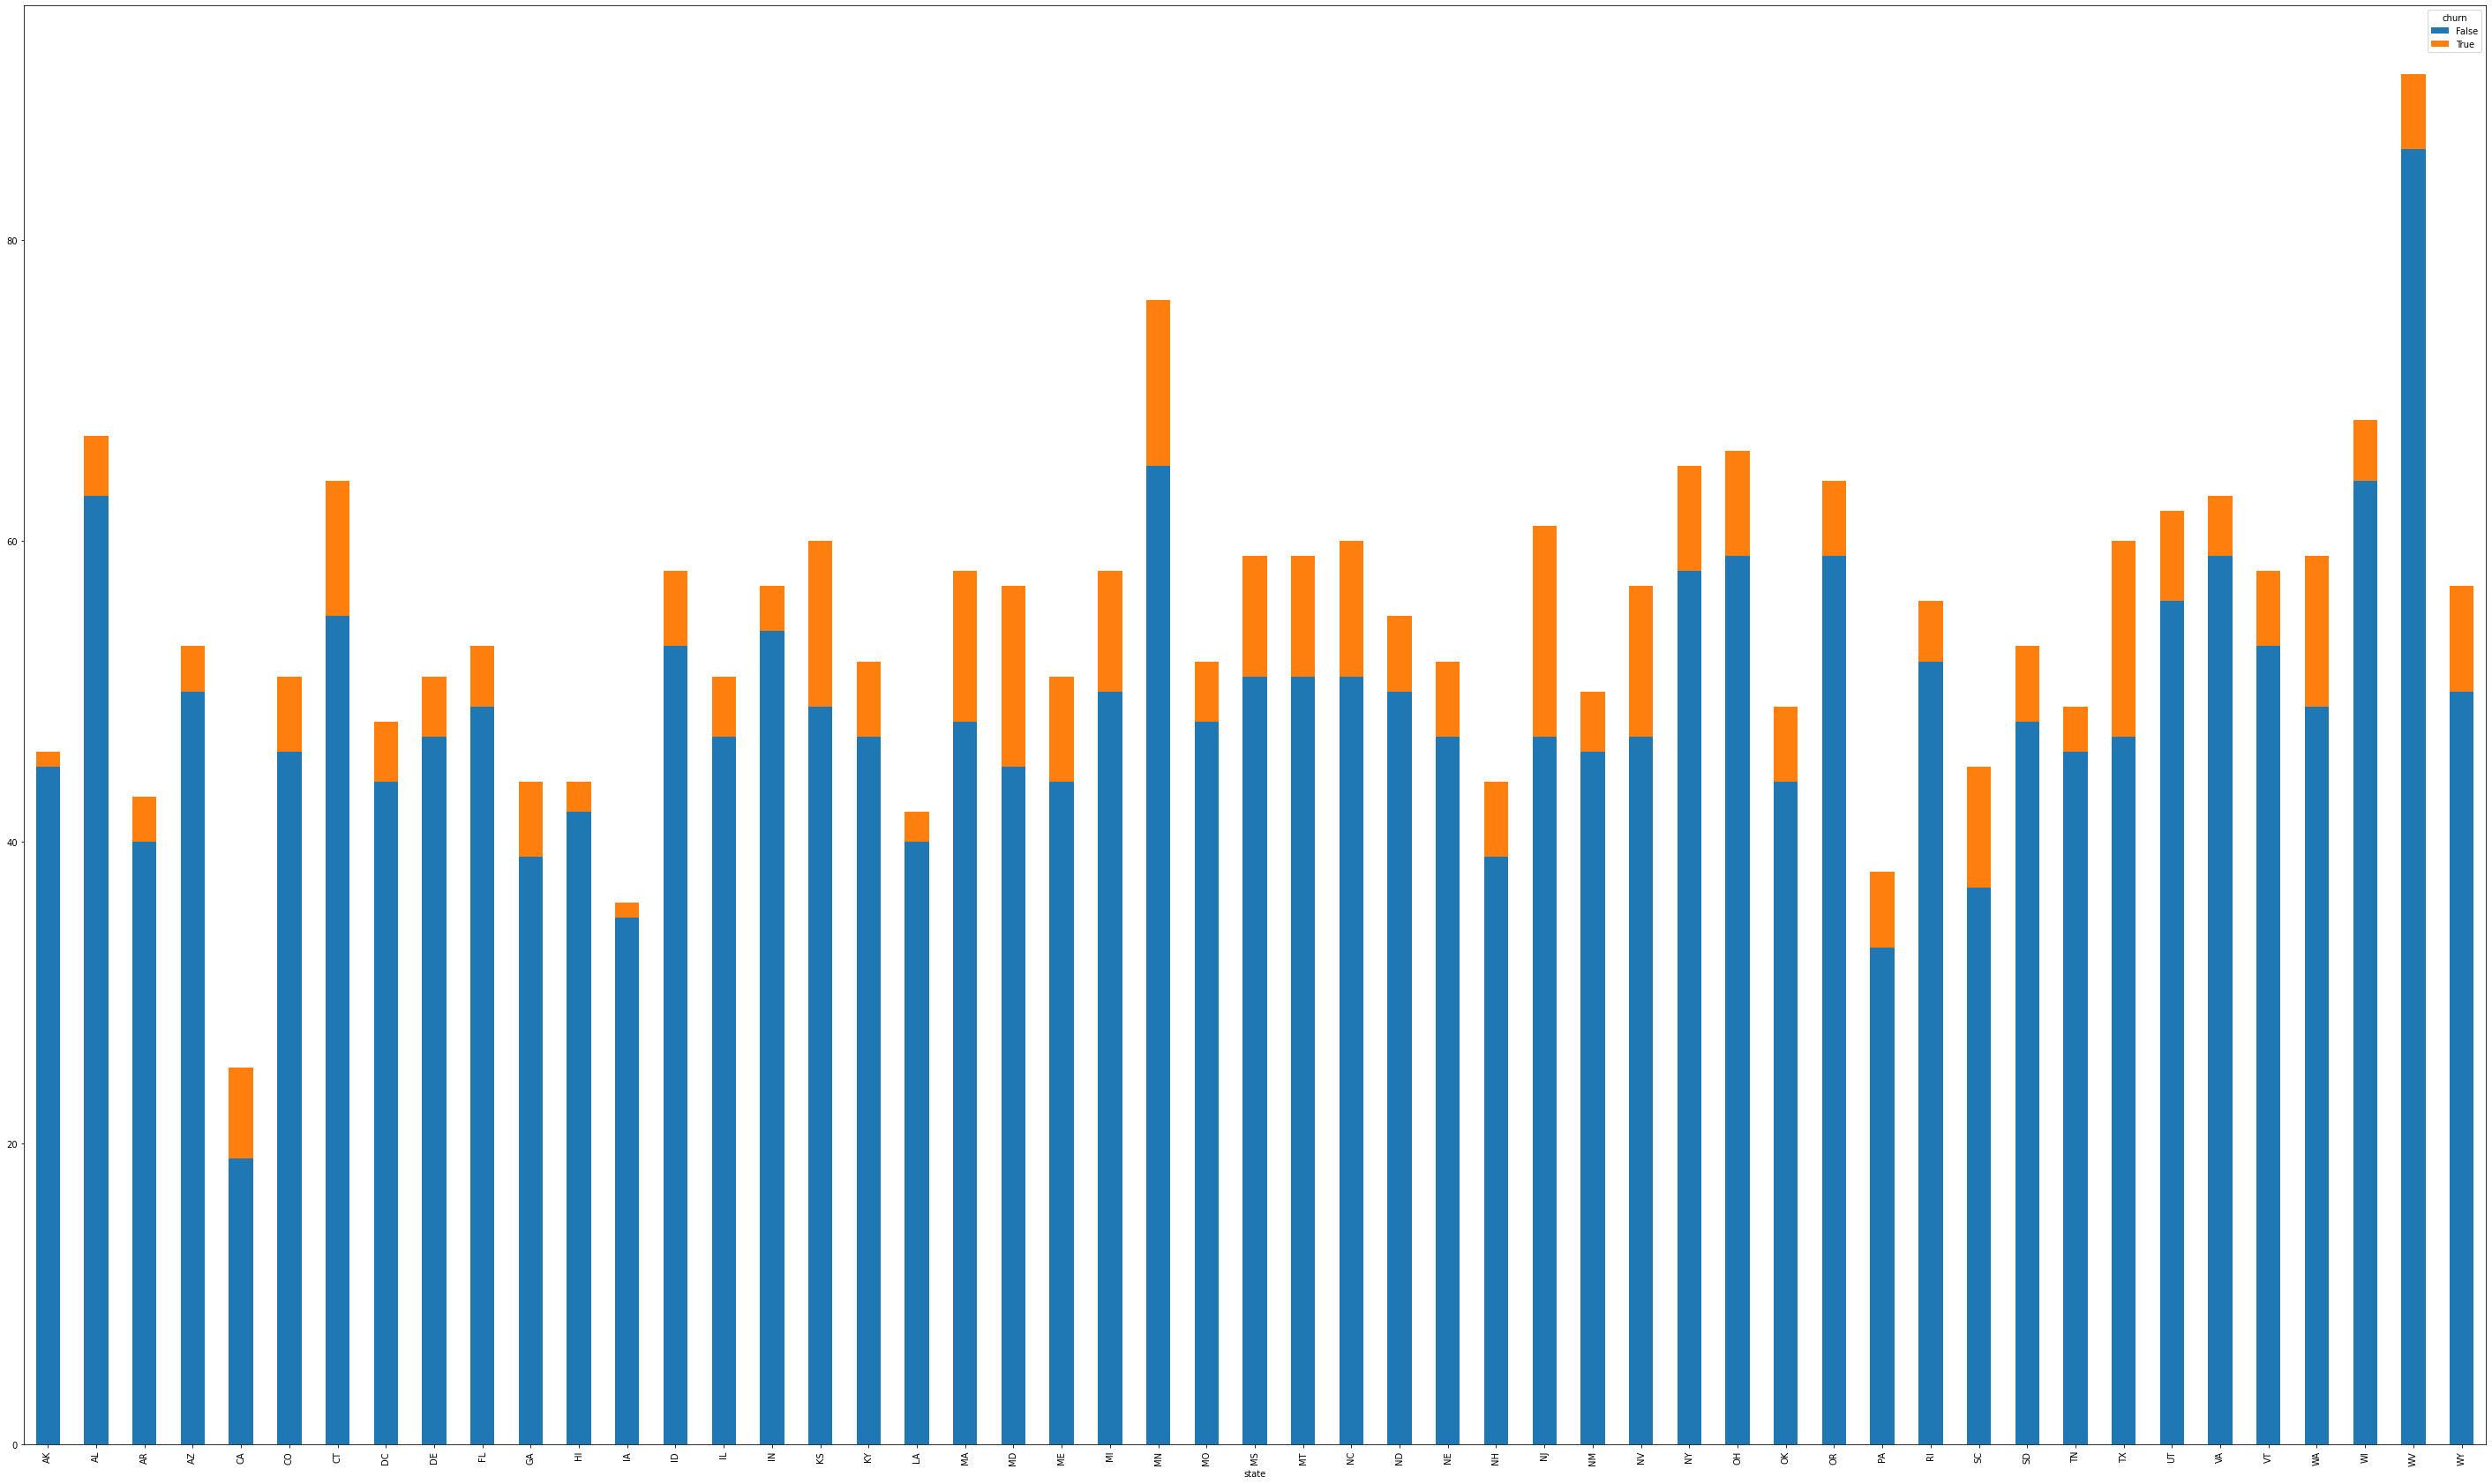

In [22]:
# Group the DataFrame 'df' by two columns: "state" and "churn"
grouped = data.groupby(["state", "churn"])

# Calculate the size (count) of each group and unstack the result
# Unstacking will pivot the data to make it suitable for a stacked bar plot
unstacked = grouped.size().unstack()

# Create a stacked bar plot using the unstacked data
unstacked.plot(kind='bar', stacked=True, figsize=(50, 30));

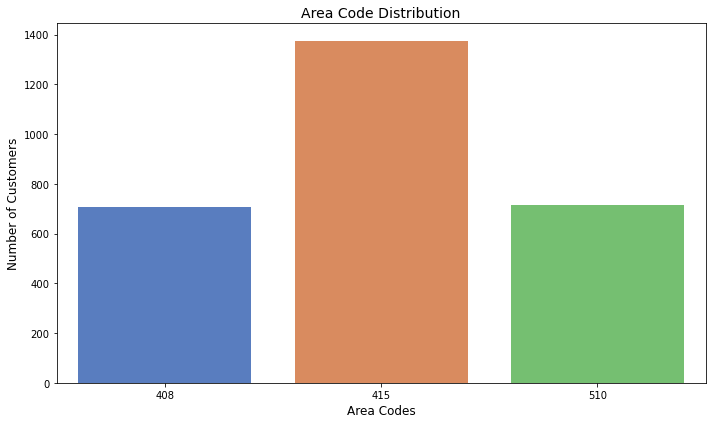

In [23]:
# Plot the distribution of customers by area code
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='area_code', palette='muted')

# Set the title and axis labels
plt.title('Area Code Distribution', fontsize=14)
plt.xlabel('Area Codes', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

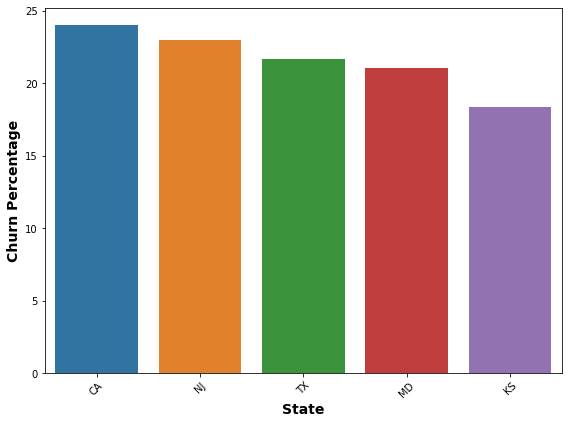

state
CA    24.000000
NJ    22.950820
TX    21.666667
MD    21.052632
KS    18.333333
Name: churn, dtype: float64

In [24]:
# Calculate churn percentage by state
state_churn_percentage = data.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

# Plotting the top 5 states
plt.figure(figsize=(8, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Churn Percentage', fontsize=14, fontweight='bold')
#plt.title('Top 5 States with Highest Churn Percentage', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate churn percentage by state
state_churn_percentage = data.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

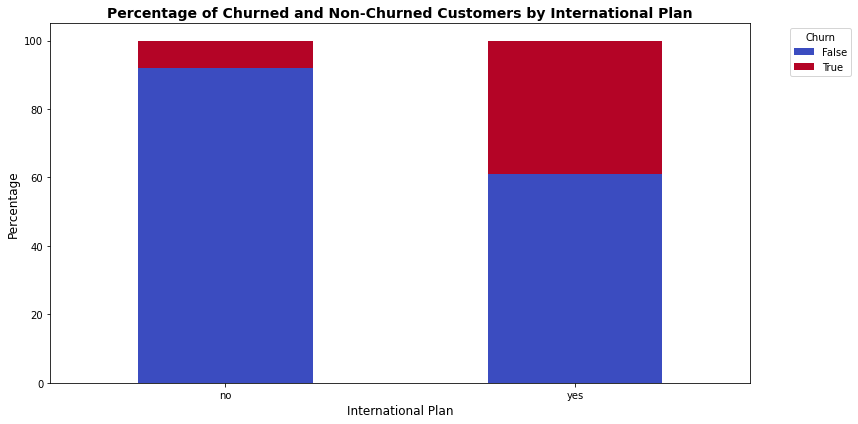

In [25]:
# Calculate the percentage of churned and non-churned customers by international plan
churn_counts = data.groupby(['international_plan', 'churn']).size().unstack()

# Calculate the percentage for each group
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the data
plt.figure(figsize=(12, 6))
churn_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

# Customize the plot
plt.title('Percentage of Churned and Non-Churned Customers by International Plan', fontsize=14, fontweight='bold')
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



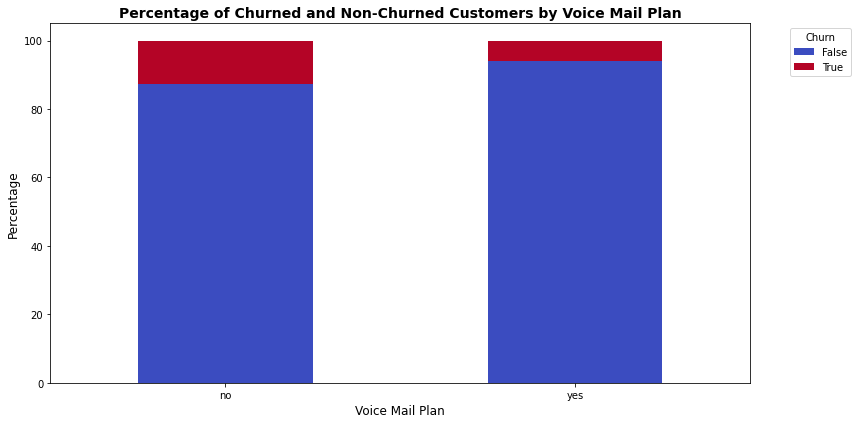

In [26]:

# Create a new DataFrame that calculates the percentage of churned and non-churned customers by voice mail plan
churn_counts = data.groupby(['voice_mail_plan', 'churn']).size().unstack().fillna(0)

# Calculate percentages for each group
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the data as a bar plot
plt.figure(figsize=(12, 6))
churn_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

# Customizing the plot
plt.title('Percentage of Churned and Non-Churned Customers by Voice Mail Plan', fontsize=14, fontweight='bold')
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better visibility
plt.show()


In [27]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [28]:
# Encode binary categorical variables
data["international_plan"] = data["international_plan"].map({"yes": 1, "no": 0})
data["voice_mail_plan"] = data["voice_mail_plan"].map({"yes": 1, "no": 0})

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encoding the "churn" column
data['churn'] = label_encoder.fit_transform(data['churn'])

In [29]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [30]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['churn', 'state'], axis=1)
y = data['churn']

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
X_train

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
1971,74,415,0,1,32,174.6,107,29.68,310.6,115,26.40,234.7,92,10.56,9.0,4,2.43,1
2173,47,510,1,0,0,47.8,120,8.13,178.9,123,15.21,152.6,96,6.87,13.3,7,3.59,0
2075,73,510,0,1,28,198.2,107,33.69,139.1,123,11.82,199.1,139,8.96,8.8,1,2.38,2
604,30,415,0,0,0,169.9,144,28.88,225.2,118,19.14,169.7,93,7.64,11.4,7,3.08,1
1298,141,510,0,1,22,215.4,123,36.62,328.7,98,27.94,160.5,89,7.22,7.8,6,2.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,114,408,0,0,0,203.8,85,34.65,87.8,110,7.46,166.2,122,7.48,11.7,4,3.16,1
1100,116,415,0,1,35,200.4,104,34.07,272.8,89,23.19,214.5,100,9.65,8.3,4,2.24,1
1337,97,510,1,0,0,236.9,107,40.27,157.6,105,13.40,241.0,120,10.85,7.3,2,1.97,0
286,137,510,0,0,0,206.4,122,35.09,128.0,102,10.88,194.5,84,8.75,8.8,5,2.38,2


In [33]:
 X_test

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
3110,31,408,0,1,28,171.8,116,29.21,240.7,125,20.46,245.5,80,11.05,10.6,7,2.86,1
2888,148,415,0,1,36,77.6,141,13.19,207.0,60,17.60,255.7,115,11.51,10.9,2,2.94,1
2989,108,408,1,0,0,115.1,114,19.57,211.3,70,17.96,136.1,85,6.12,13.8,3,3.73,2
2841,100,510,0,0,0,78.7,98,13.38,225.6,102,19.18,150.4,106,6.77,14.0,8,3.78,0
1096,93,415,0,0,0,98.4,78,16.73,249.6,129,21.22,248.2,114,11.17,14.2,4,3.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,103,415,0,1,28,121.0,105,20.57,270.4,100,22.98,160.5,76,7.22,7.7,4,2.08,2
1056,67,408,0,0,0,201.4,101,34.24,97.6,122,8.30,202.5,119,9.11,7.0,3,1.89,0
1787,146,408,0,1,31,202.5,91,34.43,241.4,108,20.52,169.6,77,7.63,7.8,2,2.11,1
3011,103,415,0,1,37,153.5,78,26.10,241.9,108,20.56,244.7,110,11.01,10.6,3,2.86,1


In [34]:
 y_train

1971    0
2173    1
2075    0
604     0
1298    0
       ..
3292    0
1100    0
1337    1
286     0
1294    0
Name: churn, Length: 2237, dtype: int64

In [35]:
y_test

3110    0
2888    0
2989    1
2841    0
1096    0
       ..
316     0
1056    0
1787    0
3011    0
265     0
Name: churn, Length: 560, dtype: int64

In [36]:
# Apply SMOTE to handle class imbalance on the training set
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply StandardScaler for feature scaling on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply feature scaling and constant term to the test set
X_test_scaled = scaler.transform(X_test)

In [37]:
# Define the pipeline steps
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear', random_state=1))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = pipeline.predict(X_test)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
accuracy

0.7875

In [38]:
# perform cross_validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.79017857 0.79910714 0.77852349 0.7360179  0.81879195]
Mean CV Score: 0.7845238095238096
